## Лабораторная работа № 11. Диагностика и кривые обучения.
### (Валяев Георгий, ПИ20-6)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from tqdm.notebook import tqdm

### Задания для выполнения

##### 1. Загрузите датасет breast_cancer.


In [2]:
breast_cancer = load_breast_cancer()
print("Основные ключи датасета:")
print(*list(breast_cancer.keys()), sep='\t\t')

Основные ключи датасета:
data		target		frame		target_names		DESCR		feature_names		filename


In [3]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

##### 2. Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.
##### 3. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [4]:
x = breast_cancer.data
y = breast_cancer.target
x_2d = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x_2d, y, test_size=0.2, random_state=False)
print("x_train shape:", x_train.shape)
print("y_train shape: {}".format(y_train.shape))
print("x_test shape:", x_test.shape)
print("y_test shape: {}".format(y_test.shape))

x_train shape: (455, 2)
y_train shape: (455,)
x_test shape: (114, 2)
y_test shape: (114,)


##### 4. Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [5]:
clf = SVC(C=0.01)
clf.fit(x_train, y_train)
print('Результат обучения на обучающей выборке: ', clf.score(x_train, y_train))
print('Результат обучения на тестовой выборке: ', clf.score(x_test, y_test))

Результат обучения на обучающей выборке:  0.6923076923076923
Результат обучения на тестовой выборке:  0.6666666666666666


##### Опираясь на значения выше, можно сказать, что модель недообучается => при использовании более сложных моделей точность можно улучшить!

##### 5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
    1. собрать больше объектов наблюдения;
    2. провести обучение на меньшем объеме данных;
    3. исключить часть признаков из модели;
    4. добавить новые признаки в модель;
    5. добавить полиномиальные признаки;
    6. попробовать более сложные модели;
    7. попробовать более простые модели;
    8. увеличить регуляризацию модели;
    9. уменьшить регуляризацию модели;

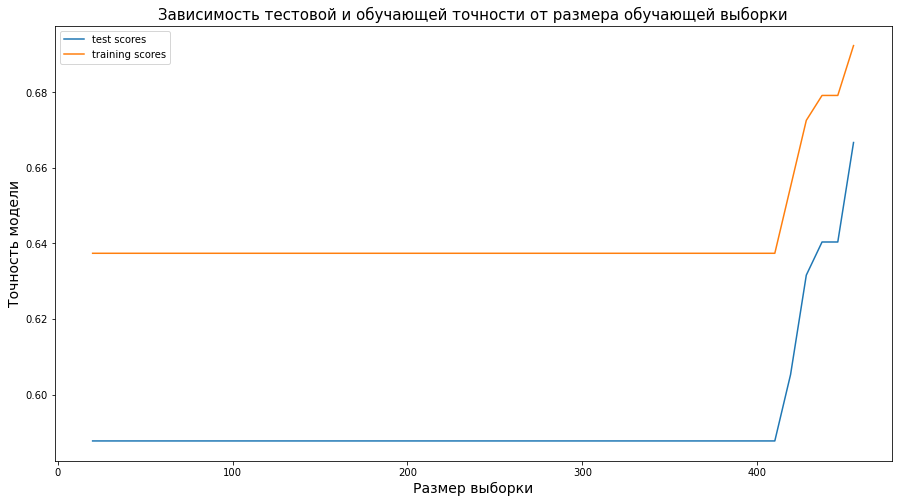

In [10]:
training_scores, test_scores, numbers = [], [], []
for i in np.linspace(20, len(x_train), 50, dtype=int):
    clf = SVC(C=0.01, kernel='rbf')
    X = x_train[:i]
    y = y_train[:i]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(15, 8))
plt.plot(numbers, test_scores, label="test scores")
plt.plot(numbers, training_scores, label="training scores")
plt.title("Зависимость тестовой и обучающей точности от размера обучающей выборки", fontsize=15)
plt.xlabel("Размер выборки", fontsize=14)
plt.ylabel("Точность модели", fontsize=14)
plt.legend(loc="best")
plt.show()

###### Проанализировав график, формируется вывод о 100%-ом недообучении модели: точность модели сама по себе мала, а также с ростом выборки в самом конце только возрастают метрики train_score & test_score
##### Для увеличения показателей можно:
1. Увеличить выборку каким-либо способом
2. Увеличить регуляризацию модели
3. Попробовать другие, более сложные модели

##### 6. Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [11]:
clf = SVC(C=0.01, kernel='rbf')
clf.fit(x_train, y_train)
print('Результат обучения на обучающей выборке: ', clf.score(x_train, y_train))
print('Результат обучения на тестовой выборке: ', clf.score(x_test, y_test))

Результат обучения на обучающей выборке:  0.6923076923076923
Результат обучения на тестовой выборке:  0.6666666666666666


##### Увеличиваем параметр регуляризации модели

In [12]:
clf = SVC(C=100, kernel='rbf')
clf.fit(x_train, y_train)
print('Результат обучения на обучающей выборке: ', clf.score(x_train, y_train))
print('Результат обучения на тестовой выборке: ', clf.score(x_test, y_test))

Результат обучения на обучающей выборке:  0.9142857142857143
Результат обучения на тестовой выборке:  0.868421052631579


###### Увеличение дало нам значительный рост итоговой точности модели, что можно и нужно использовать в дальнейшем

##### Использование модели логистической регрессии

In [16]:
reg = LogisticRegression(max_iter=5000, n_jobs=6).fit(x_train, y_train)
print('Результат обучения на обучающей выборке: ', reg.score(x_train, y_train))
print('Результат обучения на тестовой выборке: ', reg.score(x_test, y_test))

Результат обучения на обучающей выборке:  0.8989010989010989
Результат обучения на тестовой выборке:  0.8947368421052632


###### Использование другой модели классификации дало отличный и высокий результат в переобучении

##### 7. Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?
##### 8. Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

  0%|          | 0/500 [00:00<?, ?it/s]

0.8771929824561403

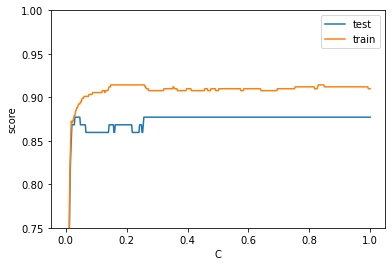

In [62]:
data = np.linspace(0.0001, 1, 500)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")
    clf.fit(x_train, y_train)
    test_scores.append(clf.score(x_test, y_test))
    train_scores.append(clf.score(x_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

In [63]:
df = pd.DataFrame()
df['C_value'] = list(np.linspace(0.0001, 1, 500)) + list(np.linspace(0.0001, 1, 500))
df['type_score'] = ['train_score' if ind <= 499 else 'test_score' for ind in range(1000)]
df['score'] = train_scores + test_scores
df

,C_value,type_score,score
0,0.000100,train_score,0.637363
1,0.002104,train_score,0.637363
2,0.004108,train_score,0.637363
3,0.006111,train_score,0.637363
4,0.008115,train_score,0.637363
...,...,...,...
995,0.991985,test_score,0.877193
996,0.993989,test_score,0.877193
997,0.995992,test_score,0.877193
998,0.997996,test_score,0.877193


In [64]:
fig = px.line(df, x='C_value', y='score', color='type_score')
fig['layout'].update(title_text='Зависимость обучающей и тестовой точностей от параметра регуляризации C')
fig.show()

  0%|          | 0/50 [00:00<?, ?it/s]

0.8771929824561403

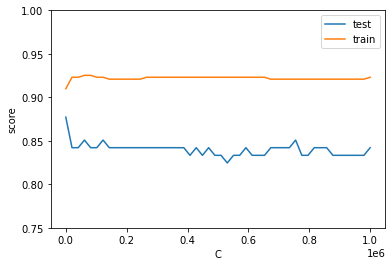

In [65]:
data = np.linspace(1, 1000000, 50)
test_scores, train_scores = [], []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")
    clf.fit(x_train, y_train)
    test_scores.append(clf.score(x_test, y_test))
    train_scores.append(clf.score(x_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

In [66]:
df = pd.DataFrame()
df['C_value'] = list(np.linspace(1, 1000000, 50)) + list(np.linspace(1, 1000000, 50))
df['type_score'] = ['train_score' if ind <= 49 else 'test_score' for ind in range(100)]
df['score'] = train_scores[:50] + test_scores
df

,C_value,type_score,score
0,1.000000,train_score,0.909890
1,20409.142857,train_score,0.923077
2,40817.285714,train_score,0.923077
3,61225.428571,train_score,0.925275
4,81633.571429,train_score,0.925275
...,...,...,...
95,918367.428571,test_score,0.833333
96,938775.571429,test_score,0.833333
97,959183.714286,test_score,0.833333
98,979591.857143,test_score,0.833333


In [67]:
fig = px.line(df, x='C_value', y='score', color='type_score')
fig['layout'].update(title_text='Зависимость обучающей и тестовой точностей от параметра регуляризации C')
fig.show()

###### Изучив динамику изменения тестовой точности, стоит сказать, что при минимальных значениях параметра регуляризации C тестовая точность максимально близка к обучающей => модель практически обучена, то есть:
- Оптимальная тестовая точность при C = 1 и меньше
- Переобучение модели дают значения C от 1 до 20 000, а также от 500 000 до 530 000
- Недообучение модели дают значения C от 40 000 до 60 000, а также от 100 000 до 120 000 + от 650 000 до 750 000
###### С большим значением C модель переобучается, а с малым - недообучается. Увеличивая аргумент C, точность модели на тренируемых данных увеличивается, а на тестовых - уменьшается.

##### 9. Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [69]:
results = []
for i in range(1,1000):
    value = i * 0.1
    clf = SVC(kernel='rbf', C=value)
    clf.fit(x_train, y_train)
    test_acc = clf.score(x_test, y_test)
    train_acc = clf.score(x_train, y_train)
    results.append((value, test_acc, train_acc))

results.sort(key=lambda x: x[1])
print(results[-1])

(51.1, 0.8771929824561403, 0.9164835164835164)


##### При переборе и сортировке метрик обучающей и тестовой точности на модели получаем, что со значением C = 51.1 тестовая точность равна 87.7%, а обучающая = 91.6%, что очень хорошо

In [78]:
clf = SVC(kernel='rbf', C=51.1)
clf.fit(x_train, y_train)
print('Результат обучения на обучающей выборке: ', clf.score(x_train, y_train))
print('Результат обучения на тестовой выборке: ', clf.score(x_test, y_test))

Результат обучения на обучающей выборке:  0.9164835164835164
Результат обучения на тестовой выборке:  0.8771929824561403


##### 10. Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

  0%|          | 0/50 [00:00<?, ?it/s]

0.9035087719298246

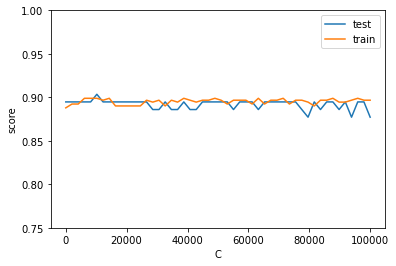

In [79]:
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="linear")
    clf.fit(x_train, y_train)
    test_scores.append(clf.score(x_test, y_test))
    train_scores.append(clf.score(x_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

In [82]:
df = pd.DataFrame()
df['C_value'] = list(np.linspace(1, 100000, 50)) + list(np.linspace(1, 100000, 50))
df['type_score'] = ['train_score' if ind <= 49 else 'test_score' for ind in range(100)]
df['score'] = train_scores + test_scores
df

,C_value,type_score,score
0,1.000000,train_score,0.887912
1,2041.795918,train_score,0.892308
2,4082.591837,train_score,0.892308
3,6123.387755,train_score,0.898901
4,8164.183673,train_score,0.898901
...,...,...,...
95,91836.816327,test_score,0.894737
96,93877.612245,test_score,0.877193
97,95918.408163,test_score,0.894737
98,97959.204082,test_score,0.894737


In [83]:
fig = px.line(df, x='C_value', y='score', color='type_score')
fig['layout'].update(title_text='Зависимость обучающей и тестовой точностей от параметра регуляризации C')
fig.show()

##### Найдём методом подбора оптимальное значение параметра регуляризации

In [84]:
results = []
for i in range(1,100):
    value = i * 0.1
    clf = SVC(kernel='linear', C=value)
    clf.fit(x_train, y_train)
    test_acc = clf.score(x_test, y_test)
    train_acc = clf.score(x_train, y_train)
    results.append((value, test_acc, train_acc))

results.sort(key=lambda x: x[2])
print(results[-1])

(9.9, 0.8947368421052632, 0.8879120879120879)


In [85]:
clf = SVC(kernel='linear', C=9.9)
clf.fit(x_train, y_train)
print('Результат обучения на обучающей выборке: ', clf.score(x_train, y_train))
print('Результат обучения на тестовой выборке: ', clf.score(x_test, y_test))

Результат обучения на обучающей выборке:  0.8879120879120879
Результат обучения на тестовой выборке:  0.8947368421052632


#### Вывод
##### Две последние модели практически одинаковые, в целом отличий характерных между ними замечено не было в процессе работы с регуляризацией моделей и анализа на предмет недо- и переобученности